In [37]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from delta import *

# warehouse_location points to the default location for managed databases and tables
warehouse_location = 'hdfs://hdfs-nn:9000/warehouse'

builder = SparkSession \
    .builder \
    .master("local[2]") \
    .appName("Python Spark DataFrames and SQL") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .config("hive.metastore.uris", "thrift://hive-metastore:9083") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-core_2.12:1.0.0") \
    .enableHiveSupport() \

spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [38]:
hdfs_path = "hdfs://hdfs-nn:9000/demo/episodes.json"

In [39]:
# Create a DataFrame from JSON data (automatically infer schema and data types)
# There are other file formats you can read from (e.g., csv, orc, parquet)
# https://spark.apache.org/docs/2.2.0/sql-programming-guide.html#data-sources

# Read Sillicon valley episodes data
episodes = spark.read.json(hdfs_path)

In [42]:
episodes.printSchema()
episodes.show()
episodes.toPandas()

root
 |-- airdate: string (nullable = true)
 |-- airstamp: string (nullable = true)
 |-- airtime: string (nullable = true)
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- number: long (nullable = true)
 |-- runtime: long (nullable = true)
 |-- season: long (nullable = true)
 |-- summary: string (nullable = true)
 |-- url: string (nullable = true)

+----------+--------------------+-------+------+--------------------+------+-------+------+--------------------+--------------------+
|   airdate|            airstamp|airtime|    id|                name|number|runtime|season|             summary|                 url|
+----------+--------------------+-------+------+--------------------+------+-------+------+--------------------+--------------------+
|2014-04-06|2014-04-06T22:00:...|  22:00| 10897|Minimum Viable Pr...|     1|     30|     1|Attending an elab...|http://www.tvmaze...|
|2014-04-13|2014-04-13T22:00:...|  22:00| 10898|       The Cap Table|     2|     30|     

airdate                   airstamp airtime      id  \
0   2014-04-06  2014-04-06T22:00:00-04:00   22:00   10897   
1   2014-04-13  2014-04-13T22:00:00-04:00   22:00   10898   
2   2014-04-20  2014-04-20T22:00:00-04:00   22:00   10899   
3   2014-04-27  2014-04-27T22:00:00-04:00   22:00   10900   
4   2014-05-04  2014-05-04T22:00:00-04:00   22:00   10901   
5   2014-05-11  2014-05-11T22:00:00-04:00   22:00   10902   
6   2014-05-18  2014-05-18T22:00:00-04:00   22:00   10903   
7   2014-06-01  2014-06-01T22:00:00-04:00   22:00   10904   
8   2015-04-12  2015-04-12T22:00:00-04:00   22:00  117409   
9   2015-04-19  2015-04-19T22:00:00-04:00   22:00  142992   
10  2015-04-26  2015-04-26T22:00:00-04:00   22:00  142993   
11  2015-05-03  2015-05-03T22:00:00-04:00   22:00  142994   
12  2015-05-10  2015-05-10T22:00:00-04:00   22:00  153965   
13  2015-05-17  2015-05-17T22:00:00-04:00   22:00  154580   
14  2015-05-24  2015-05-24T22:00:00-04:00   22:00  155129   
15  2015-05-31  2015-05-31T22:00:00-04:00   22:00  155130   
16  2015-06-07  2015-06-07T22:00:00-04:00   22:00  155199   
17  2015-06-14  2015-06-14T22:00:00-04:00   22:00  155200   
18  2016-04-24  2016-04-24T22:00:00-04:00   22:00  560883   
19  2016-05-01  2016-05-01T22:00:00-04:00   22:00  668661   
20  2016-05-08  2016-05-08T22:00:00-04:00   22:00  668662   
21  2016-05-15  2016-05-15T22:00:00-04:00   22:00  670680   
22  2016-05-22  2016-05-22T22:00:00-04:00   22:00  670682   
23  2016-05-29  2016-05-29T22:00:00-04:00   22:00  670681   
24  2016-06-05  2016-06-05T22:00:00-04:00   22:00  717453   
25  2016-06-12  2016-06-12T22:00:00-04:00   22:00  729570   
26  2016-06-19  2016-06-19T22:00:00-04:00   22:00  729571   
27  2016-06-26  2016-06-26T22:00:00-04:00   22:00  729572   

                              name  number  runtime  season  \
0           Minimum Viable Product       1       30       1   
1                    The Cap Table       2       30       1   
2        Articles of Incorporation       3       30       1   
3                 Fiduciary Duties       4       30       1   
4                   Signaling Risk       5       30       1   
5           Third Party Insourcing       6       30       1   
6                 Proof of Concept       7       30       1   
7    Optimal Tip-to-Tip Efficiency       8       30       1   
8                Sand Hill Shuffle       1       30       2   
9              Runaway Devaluation       2       30       2   
10                       Bad Money       3       30       2   
11                        The Lady       4       30       2   
12                    Server Space       5       30       2   
13                        Homicide       6       30       2   
14                   Adult Content       7       30       2   
15             White Hat/Black Hat       8       30       2   
16             Binding Arbitration       9       30       2   
17          Two Days of The Condor      10       30       2   
18                Founder Friendly       1       30       3   
19                  Two in the Box       2       30       3   
20       Meinertzhagen's Haversack       3       30       3   
21  Maleant Data Systems Solutions       4       30       3   
22                 The Empty Chair       5       30       3   
23             Bachmanity Insanity       6       30       3   
24          To Build a Better Beta       7       30       3   
25   Bachman's Earning's Over-ride       8       30       3   
26              Daily Active Users       9       30       3   
27                      The Uptick      10       30       3   

                                              summary  \
0   Attending an elaborate launch party, Richard  ...   
1   After a celebratory party at the Hacker Hostel...   
2   While Gavin Belson begins to hype Nucleus, a c...   
3   At Peter's toga party, Richard drunkenly promi...   
4   Erlich  convinces a graffiti artist to create ...   
5   Richard feels threatened when the team hires "...   
6   At Tec

As you can see, you now have a Spark DataFrame created from your JSON file in HDFS :)

You can now use the Spark DataFrame functions to interact with DataFrames: Spark Dataframe operations

A complete list of DataFrame operations with examples can be found here https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.sql.html. There you can find how to apply filter and group functions, joins, iterate through the dataframe and apply python functions, drop dupicates, among many other operations at the DataFrame level.

A complete list of Spark SQL functions with examples to apply to the columns of DataFrames can be found here https://spark.apache.org/docs/latest/api/sql/index.html. There you can find how to check for nulls, do string replaces, among many others.

In [9]:
# Show statistics
episodes_stats = episodes.summary()
# For each function, you can search for the corresponding documentation and examples: 
# https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.summary.html#pyspark.sql.DataFrame.summary

episodes_stats.toPandas()

summary     airdate                   airstamp airtime                  id  \
0   count          28                         28      28                  28   
1    mean        None                       None    None            299257.5   
2  stddev        None                       None    None  297037.51991083176   
3     min  2014-04-06  2014-04-06T22:00:00-04:00   22:00               10897   
4     25%        None                       None    None               10903   
5     50%        None                       None    None              154580   
6     75%        None                       None    None              668662   
7     max  2016-06-26  2016-06-26T22:00:00-04:00   22:00              729572   

                  name             number runtime              season  \
0                   28                 28      28                  28   
1                 None  5.214285714285714    30.0  2.0714285714285716   
2                 None  2.806832178507806     0.0  0.8132500607904444   
3        Adult Content                  1      30                   1   
4                 None                  3      30                   1   
5                 None                  5      30                   2   
6                 None                  7      30                   3   
7  White Hat/Black Hat                 10      30                   3   

                                             summary  \
0                                                 28   
1                                               None   
2                                               None   
3  After a celebratory party at the Hacker Hostel...   
4                                               None   
5                                               None   
6                                               None   
7  With Pied Piper's future in question, Erlich's...   

                                                 url  
0                                                 28  
1                                               None  
2                                               None  
3  http://www.tvmaze.com/episodes/10897/silicon-v...  
4                                               None  
5                                               None  
6                                               None  
7  http://www.tvmaze.com/episodes/729572/silicon-...

In [53]:
# In case we want to do complementary analysis to find out distinct values for particular columns, being used for filtering
episodes.select("season", "runtime").distinct().show(truncate=False)

+------+-------+
|season|runtime|
+------+-------+
|1     |30     |
|2     |30     |
|3     |30     |
+------+-------+



In [77]:
from pyspark.sql.functions import avg, sum

# Filter the episodes by runtime
filtered_episodes = episodes.filter((episodes.runtime >= 10) & (episodes.runtime <= 30))

# Group them by airdate and name, calculating the average and sum of number of episodes
grouped_episodes = filtered_episodes \
    .groupBy("airdate", "name") \
    .agg(
        avg(filtered_episodes.number).alias("number_avg"), 
        sum(filtered_episodes.number).alias("number_sum")
    )

# toPandas() is an action (similar to show)
grouped_episodes.toPandas()

airdate                            name  number_avg  number_sum
0   2015-05-03                        The Lady         4.0           4
1   2014-04-27                Fiduciary Duties         4.0           4
2   2014-06-01   Optimal Tip-to-Tip Efficiency         8.0           8
3   2014-04-06          Minimum Viable Product         1.0           1
4   2015-04-26                       Bad Money         3.0           3
5   2016-05-15  Maleant Data Systems Solutions         4.0           4
6   2016-06-19              Daily Active Users         9.0           9
7   2016-04-24                Founder Friendly         1.0           1
8   2014-05-04                  Signaling Risk         5.0           5
9   2016-05-01                  Two in the Box         2.0           2
10  2016-05-08       Meinertzhagen's Haversack         3.0           3
11  2015-04-12               Sand Hill Shuffle         1.0           1
12  2014-05-11          Third Party Insourcing         6.0           6
13  2016-06-26                      The Uptick        10.0          10
14  2015-06-14          Two Days of The Condor        10.0          10
15  2016-05-29             Bachmanity Insanity         6.0           6
16  2014-04-13                   The Cap Table         2.0           2
17  2015-05-24                   Adult Content         7.0           7
18  2016-06-12   Bachman's Earning's Over-ride         8.0           8
19  2016-06-05          To Build a Better Beta         7.0           7
20  2015-05-31             White Hat/Black Hat         8.0           8
21  2015-05-10                    Server Space         5.0           5
22  2015-06-07             Binding Arbitration         9.0           9
23  2014-04-20       Articles of Incorporation         3.0           3
24  2015-04-19             Runaway Devaluation         2.0           2
25  2016-05-22                 The Empty Chair         5.0           5
26  2015-05-17                        Homicide         6.0           6
27  2014-05-18                Proof of Concept         7.0           7

In [78]:
# Value replacement
# Null checking
# String concat

from pyspark.sql.functions import when, col, concat, lit

replaced_episodes = grouped_episodes.withColumn(
    "name",
    when(
        (col("name") == "The Lady") | (col("name") == "Fiduciary Duties") | (col("name") == None), 
        "The Replaced Ones"
    ).otherwise(concat(lit("EP - "), col("name")))
)

replaced_episodes.toPandas()

airdate                                 name  number_avg  number_sum
0   2015-05-03                    The Replaced Ones         4.0           4
1   2014-04-27                    The Replaced Ones         4.0           4
2   2014-06-01   EP - Optimal Tip-to-Tip Efficiency         8.0           8
3   2014-04-06          EP - Minimum Viable Product         1.0           1
4   2015-04-26                       EP - Bad Money         3.0           3
5   2016-05-15  EP - Maleant Data Systems Solutions         4.0           4
6   2016-06-19              EP - Daily Active Users         9.0           9
7   2016-04-24                EP - Founder Friendly         1.0           1
8   2014-05-04                  EP - Signaling Risk         5.0           5
9   2016-05-01                  EP - Two in the Box         2.0           2
10  2016-05-08       EP - Meinertzhagen's Haversack         3.0           3
11  2015-04-12               EP - Sand Hill Shuffle         1.0           1
12  2014-05-11          EP - Third Party Insourcing         6.0           6
13  2016-06-26                      EP - The Uptick        10.0          10
14  2015-06-14          EP - Two Days of The Condor        10.0          10
15  2016-05-29             EP - Bachmanity Insanity         6.0           6
16  2014-04-13                   EP - The Cap Table         2.0           2
17  2015-05-24                   EP - Adult Content         7.0           7
18  2016-06-12   EP - Bachman's Earning's Over-ride         8.0           8
19  2016-06-05          EP - To Build a Better Beta         7.0           7
20  2015-05-31             EP - White Hat/Black Hat         8.0           8
21  2015-05-10                    EP - Server Space         5.0           5
22  2015-06-07             EP - Binding Arbitration         9.0           9
23  2014-04-20       EP - Articles of Incorporation         3.0           3
24  2015-04-19             EP - Runaway Devaluation         2.0           2
25  2016-05-22                 EP - The Empty Chair         5.0           5
26  2015-05-17                        EP - Homicide         6.0           6
27  2014-05-18                EP - Proof of Concept         7.0           7

In [86]:
# Pivot - rows to columns

from pyspark.sql.functions import expr

pivot_episodes = grouped_episodes \
    .groupBy("name") \
    .pivot("airdate") \
    .agg(expr("first(number_avg)").cast("double"))

pivot_episodes.toPandas()

name  2014-04-06  2014-04-13  2014-04-20  \
0                 Founder Friendly         NaN         NaN         NaN   
1                   Two in the Box         NaN         NaN         NaN   
2                       The Uptick         NaN         NaN         NaN   
3    Bachman's Earning's Over-ride         NaN         NaN         NaN   
4        Articles of Incorporation         NaN         NaN         3.0   
5   Maleant Data Systems Solutions         NaN         NaN         NaN   
6              Runaway Devaluation         NaN         NaN         NaN   
7                         Homicide         NaN         NaN         NaN   
8        Meinertzhagen's Haversack         NaN         NaN         NaN   
9    Optimal Tip-to-Tip Efficiency         NaN         NaN         NaN   
10          Minimum Viable Product         1.0         NaN         NaN   
11              Daily Active Users         NaN         NaN         NaN   
12                    Server Space         NaN         NaN         NaN   
13          Third Party Insourcing         NaN         NaN         NaN   
14               Sand Hill Shuffle         NaN         NaN         NaN   
15                Fiduciary Duties         NaN         NaN         NaN   
16                        The Lady         NaN         NaN         NaN   
17             Binding Arbitration         NaN         NaN         NaN   
18             White Hat/Black Hat         NaN         NaN         NaN   
19                 The Empty Chair         NaN         NaN         NaN   
20             Bachmanity Insanity         NaN         NaN         NaN   
21                       Bad Money         NaN         NaN         NaN   
22          To Build a Better Beta         NaN         NaN         NaN   
23                  Signaling Risk         NaN         NaN         NaN   
24                   Adult Content         NaN         NaN         NaN   
25                Proof of Concept         NaN         NaN         NaN   
26          Two Days of The Condor         NaN         NaN         NaN   
27                   The Cap Table         NaN         2.0         NaN   

    2014-04-27  2014-05-04  2014-05-11  2014-05-18  2014-06-01  2015-04-12  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
5          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7          NaN         NaN         NaN         NaN         NaN         NaN   
8          NaN         NaN         NaN         NaN         NaN         NaN   
9          NaN         NaN         NaN         NaN         8.0         NaN   
10         NaN         NaN         NaN         NaN         NaN         NaN   
11         NaN         NaN         NaN         NaN         NaN         NaN   
12         NaN         NaN         NaN         NaN         NaN         NaN   
13         NaN         NaN         6.0         NaN         NaN         NaN   
14         NaN         NaN         NaN         NaN         NaN         1.0   
15         4.0         NaN         NaN         NaN         NaN         NaN   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17         NaN         NaN         NaN         NaN         NaN         NaN   
18         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   
20         NaN         NaN         NaN         NaN         NaN         NaN   
21         NaN         NaN         NaN         NaN         NaN         NaN   
22         NaN         NaN         NaN         NaN         NaN         NaN   
23         

In [91]:
# Pivot - rows to columns

from pyspark.sql.functions import expr, year

pivot_episodes = grouped_episodes \
    .withColumn("year", year("airdate")) \
    .groupBy("name") \
    .pivot("year") \
    .agg(expr("first(number_avg)").cast("double"))

pivot_episodes.toPandas()

name  2014  2015  2016
0                 Founder Friendly   NaN   NaN   1.0
1                   Two in the Box   NaN   NaN   2.0
2                       The Uptick   NaN   NaN  10.0
3    Bachman's Earning's Over-ride   NaN   NaN   8.0
4        Articles of Incorporation   3.0   NaN   NaN
5   Maleant Data Systems Solutions   NaN   NaN   4.0
6              Runaway Devaluation   NaN   2.0   NaN
7                         Homicide   NaN   6.0   NaN
8        Meinertzhagen's Haversack   NaN   NaN   3.0
9    Optimal Tip-to-Tip Efficiency   8.0   NaN   NaN
10          Minimum Viable Product   1.0   NaN   NaN
11              Daily Active Users   NaN   NaN   9.0
12                    Server Space   NaN   5.0   NaN
13          Third Party Insourcing   6.0   NaN   NaN
14               Sand Hill Shuffle   NaN   1.0   NaN
15                Fiduciary Duties   4.0   NaN   NaN
16                        The Lady   NaN   4.0   NaN
17             Binding Arbitration   NaN   9.0   NaN
18             White Hat/Black Hat   NaN   8.0   NaN
19                 The Empty Chair   NaN   NaN   5.0
20             Bachmanity Insanity   NaN   NaN   6.0
21                       Bad Money   NaN   3.0   NaN
22          To Build a Better Beta   NaN   NaN   7.0
23                  Signaling Risk   5.0   NaN   NaN
24                   Adult Content   NaN   7.0   NaN
25                Proof of Concept   7.0   NaN   NaN
26          Two Days of The Condor   NaN  10.0   NaN
27                   The Cap Table   2.0   NaN   NaN

In [97]:
# Unpivot - Columns to rows
unpivot_episodes = pivot_episodes.select(
        col("name"),
        expr("stack(3, '2014', `2014`, '2015', `2015`, '2016', `2016`) as (Date,Num)")
)
# if we want to keep NaN/Null out when transforming columns to rows:
#.where("Num is not null")
    
unpivot_episodes.toPandas()

name  Date   Num
0         Founder Friendly  2014   NaN
1         Founder Friendly  2015   NaN
2         Founder Friendly  2016   1.0
3           Two in the Box  2014   NaN
4           Two in the Box  2015   NaN
..                     ...   ...   ...
79  Two Days of The Condor  2015  10.0
80  Two Days of The Condor  2016   NaN
81           The Cap Table  2014   2.0
82           The Cap Table  2015   NaN
83           The Cap Table  2016   NaN

[84 rows x 3 columns]

In [98]:
# use map for functions that cannot be executed in withColumn
# map is less performant!!!
# custom needs
custom_functions_rdd = unpivot_episodes.rdd.map(
    lambda row: (row.name, 0.0 if row.Num is None else row.Num)
)

custom_functions_rdd \
    .toDF(["name","num"]) \
    .show()

+--------------------+----+
|                name| num|
+--------------------+----+
|    Founder Friendly| 0.0|
|    Founder Friendly| 0.0|
|    Founder Friendly| 1.0|
|      Two in the Box| 0.0|
|      Two in the Box| 0.0|
|      Two in the Box| 2.0|
|          The Uptick| 0.0|
|          The Uptick| 0.0|
|          The Uptick|10.0|
|Bachman's Earning...| 0.0|
|Bachman's Earning...| 0.0|
|Bachman's Earning...| 8.0|
|Articles of Incor...| 3.0|
|Articles of Incor...| 0.0|
|Articles of Incor...| 0.0|
|Maleant Data Syst...| 0.0|
|Maleant Data Syst...| 0.0|
|Maleant Data Syst...| 4.0|
| Runaway Devaluation| 0.0|
| Runaway Devaluation| 2.0|
+--------------------+----+
only showing top 20 rows



### Exercise 1
The challenge (not included here) would be to join two dataframes, can you do it?
- Let's try to join the initial dataframe **episodes** with the grouped dataframe **grouped_episodes** and get the metrics number_avg and number_sum



### What about SQL queries?

Did you realize what you just did? You performed a filtering, group by and join operation over potentially hundreds or thousands of machines working at your disposal :D

Welcome to Apache Spark, where you write code whose computation is automatically distributed for you!!!

I'm wondering if we can write SQL on top of a JSON file. Let's see…

In [105]:
# First you need to create a temporary view
episodes.createOrReplaceTempView("episodes")

# Then you can write all the SQL you want, as your json is seen as a regular table now.
sqlized_df = spark.sql(
    """
    SELECT * 
    FROM episodes
    WHERE runtime >= 30
    """
)

sqlized_df.toPandas()

airdate                   airstamp airtime      id  \
0   2014-04-06  2014-04-06T22:00:00-04:00   22:00   10897   
1   2014-04-13  2014-04-13T22:00:00-04:00   22:00   10898   
2   2014-04-20  2014-04-20T22:00:00-04:00   22:00   10899   
3   2014-04-27  2014-04-27T22:00:00-04:00   22:00   10900   
4   2014-05-04  2014-05-04T22:00:00-04:00   22:00   10901   
5   2014-05-11  2014-05-11T22:00:00-04:00   22:00   10902   
6   2014-05-18  2014-05-18T22:00:00-04:00   22:00   10903   
7   2014-06-01  2014-06-01T22:00:00-04:00   22:00   10904   
8   2015-04-12  2015-04-12T22:00:00-04:00   22:00  117409   
9   2015-04-19  2015-04-19T22:00:00-04:00   22:00  142992   
10  2015-04-26  2015-04-26T22:00:00-04:00   22:00  142993   
11  2015-05-03  2015-05-03T22:00:00-04:00   22:00  142994   
12  2015-05-10  2015-05-10T22:00:00-04:00   22:00  153965   
13  2015-05-17  2015-05-17T22:00:00-04:00   22:00  154580   
14  2015-05-24  2015-05-24T22:00:00-04:00   22:00  155129   
15  2015-05-31  2015-05-31T22:00:00-04:00   22:00  155130   
16  2015-06-07  2015-06-07T22:00:00-04:00   22:00  155199   
17  2015-06-14  2015-06-14T22:00:00-04:00   22:00  155200   
18  2016-04-24  2016-04-24T22:00:00-04:00   22:00  560883   
19  2016-05-01  2016-05-01T22:00:00-04:00   22:00  668661   
20  2016-05-08  2016-05-08T22:00:00-04:00   22:00  668662   
21  2016-05-15  2016-05-15T22:00:00-04:00   22:00  670680   
22  2016-05-22  2016-05-22T22:00:00-04:00   22:00  670682   
23  2016-05-29  2016-05-29T22:00:00-04:00   22:00  670681   
24  2016-06-05  2016-06-05T22:00:00-04:00   22:00  717453   
25  2016-06-12  2016-06-12T22:00:00-04:00   22:00  729570   
26  2016-06-19  2016-06-19T22:00:00-04:00   22:00  729571   
27  2016-06-26  2016-06-26T22:00:00-04:00   22:00  729572   

                              name  number  runtime  season  \
0           Minimum Viable Product       1       30       1   
1                    The Cap Table       2       30       1   
2        Articles of Incorporation       3       30       1   
3                 Fiduciary Duties       4       30       1   
4                   Signaling Risk       5       30       1   
5           Third Party Insourcing       6       30       1   
6                 Proof of Concept       7       30       1   
7    Optimal Tip-to-Tip Efficiency       8       30       1   
8                Sand Hill Shuffle       1       30       2   
9              Runaway Devaluation       2       30       2   
10                       Bad Money       3       30       2   
11                        The Lady       4       30       2   
12                    Server Space       5       30       2   
13                        Homicide       6       30       2   
14                   Adult Content       7       30       2   
15             White Hat/Black Hat       8       30       2   
16             Binding Arbitration       9       30       2   
17          Two Days of The Condor      10       30       2   
18                Founder Friendly       1       30       3   
19                  Two in the Box       2       30       3   
20       Meinertzhagen's Haversack       3       30       3   
21  Maleant Data Systems Solutions       4       30       3   
22                 The Empty Chair       5       30       3   
23             Bachmanity Insanity       6       30       3   
24          To Build a Better Beta       7       30       3   
25   Bachman's Earning's Over-ride       8       30       3   
26              Daily Active Users       9       30       3   
27                      The Uptick      10       30       3   

                                              summary  \
0   Attending an elaborate launch party, Richard  ...   
1   After a celebratory party at the Hacker Hostel...   
2   While Gavin Belson begins to hype Nucleus, a c...   
3   At Peter's toga party, Richard drunkenly promi...   
4   Erlich  convinces a graffiti artist to create ...   
5   Richard feels threatened when the team hires "...   
6   At Tec

Say what?
No way, SQL over JSON, TXT or other files?? :O

That's cool and everything, but what about writing sql and visualize the results? There's no chance that's possible, pff

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

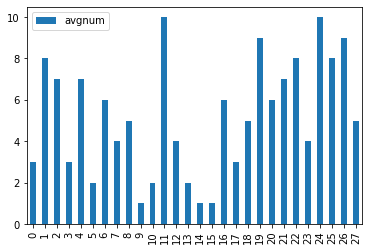

In [106]:
import matplotlib.pyplot as plt

# Watch out for the size of the returned results
# Remember the collect problem in the Intro to Spark
# Well, the concept is the same here
sqlized_pandas_df = spark.sql(
    """
    SELECT 'yes, it is' AS surpise, airdate, AVG(number) AS avgnum
    FROM episodes
    GROUP BY airdate
    """
).toPandas()

plt.figure()

sqlized_pandas_df.plot(kind="bar")

In [109]:
# Saving the results
# Well, I'm out… just save the results into a Parquet dataset to be used by Hive

# By the way you can save them back to JSON, ORC, CSV, …
replaced_episodes \
    .write \
    .format("delta") \
    .mode("overwrite") \
    .save("hdfs://hdfs-nn:9000/demo/episodes-out")

In [29]:
# Notice that you have multiple files
# One per partition (default is 200, but adjustable via spark.shuffle.partitions). Remember shuffle?
# To chose number of output files you have to use coalesce or repartition
# This is a heavy operation because it involves heavy shuffling
replaced_episodes \
    .repartition(1) \
    .write \
    .format("delta") \
    .mode("overwrite") \
    .save("hdfs://hdfs-nn:9000/demo/episodes-out")

In [117]:
# with partitions
# Notice this option, what if we try without it?! .option("overwriteSchema", "true") 

from pyspark.sql.functions import year

replaced_episodes \
    .withColumn("year", year(col("airdate"))) \
    .repartition(1) \
    .write \
    .partitionBy("year") \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .save("hdfs://hdfs-nn:9000/demo/episodes-out")

In [125]:
# How can I inspect the history of all these actions that I just executed?
# Notice the difference in the numFiles property
spark.sql(
    """
    DESCRIBE HISTORY delta.`hdfs://hdfs-nn:9000/demo/episodes-out`
    """
).show(truncate=False)

+-------+-----------------------+------+--------+---------+--------------------------------------------+----+--------+---------+-----------+--------------+-------------+--------------------------------------------------------------+------------+
|version|timestamp              |userId|userName|operation|operationParameters                         |job |notebook|clusterId|readVersion|isolationLevel|isBlindAppend|operationMetrics                                              |userMetadata|
+-------+-----------------------+------+--------+---------+--------------------------------------------+----+--------+---------+-----------+--------------+-------------+--------------------------------------------------------------+------------+
|6      |2021-11-06 16:54:01.26 |null  |null    |WRITE    |{mode -> Overwrite, partitionBy -> ["year"]}|null|null    |null     |5          |null          |false        |{numFiles -> 3, numOutputBytes -> 4739, numOutputRows -> 28}  |null        |
|5      |2021-11

In [126]:
# A different way to get the same info
deltaTable = DeltaTable.forPath(spark, "hdfs://hdfs-nn:9000/demo/episodes-out")

deltaTable.history().show()

+-------+--------------------+------+--------+---------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+
|version|           timestamp|userId|userName|operation| operationParameters| job|notebook|clusterId|readVersion|isolationLevel|isBlindAppend|    operationMetrics|userMetadata|
+-------+--------------------+------+--------+---------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+
|      6|2021-11-06 16:54:...|  null|    null|    WRITE|{mode -> Overwrit...|null|    null|     null|          5|          null|        false|{numFiles -> 3, n...|        null|
|      5|2021-11-06 16:53:...|  null|    null|    WRITE|{mode -> Overwrit...|null|    null|     null|          4|          null|        false|{numFiles -> 3, n...|        null|
|      4|2021-11-06 16:52:...|  null|    null|    WRITE|{mode -> Overwrit...|null|    null|     null|          3|  

### Documentation Summary:

For a list of complete Spark SQL (dataframes) functions:
- https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.sql.html
- https://spark.apache.org/docs/latest/api/sql/index.html

For more operations with delta lake tables:
- https://docs.delta.io/latest/delta-utility.html

In [ ]:
spark.stop()

### Exercise 2
1) Process two datasets that you’ll use in the practical project.

2) Find how to perform a join between them.

3) Save the results on a silver delta table.